In [28]:
import pandas as pd
import matplotlib.pyplot as plt

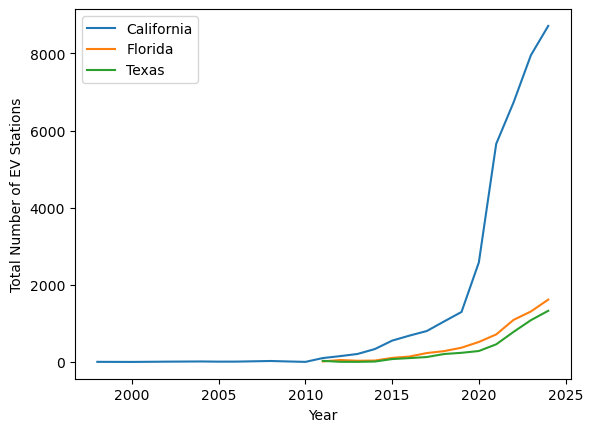

In [35]:
# Load the data from the .csv files
df_tx_topfive = pd.read_csv(Path("../../../data/processed_data/tx_cleaned_ev_stations_data_topfive.csv"))
df_fl_topfive = pd.read_csv(Path("../../../data/processed_data/fl_cleaned_ev_stations_data_topfive_2.csv"))
df_ca_topfive = pd.read_csv(Path("../../../data/processed_data/ca_cleaned_ev_stations_topfive_data.csv"))

# Merge the cleaned DataFrames for California, Florida, and Texas based on the 'year' column
combined_df = pd.concat([df_tx_topfive,df_fl_topfive,df_ca_topfive])

# Group by 'year' and sum the 'cumulative_ev_stations' for each state
progression_df = combined_df.groupby(['year', 'county']).sum().reset_index()

# Create a progression graph with years on the x-axis and total number of EVs on the y-axis
fig, ax = plt.subplots()
for state in ['California', 'Florida', 'Texas']:
    state_data = progression_df[progression_df['county'].str.contains(state)]
    ax.plot(state_data['year'], state_data['cumulative_ev_stations'], label=state)

# Add labels and legend
ax.set_xlabel('Year') 
ax.set_ylabel('Total Number of EV Stations')
ax.legend()

# Show the progression graph
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression

# Filter the data for each state
ca_data = progression_df[progression_df['county'] == 'California']
fl_data = progression_df[progression_df['county'] == 'Florida']
tx_data = progression_df[progression_df['county'] == 'Texas']

# Fit a linear regression model for each state
model_ca = LinearRegression()
model_ca.fit(ca_data[['year']], ca_data['cumulative_ev_stations'])

model_fl = LinearRegression()
model_fl.fit(fl_data[['year']], fl_data['cumulative_ev_stations'])

model_tx = LinearRegression()
model_tx.fit(tx_data[['year']], tx_data['cumulative_ev_stations'])

# Make predictions for the year 2030
pred_ca = model_ca.predict([[2030]])
pred_fl = model_fl.predict([[2030]])
pred_tx = model_tx.predict([[2030]])

print("Predicted number of EV stations in California by 2030:", pred_ca)
print("Predicted number of EV stations in Florida by 2030:", pred_fl)
print("Predicted number of EV stations in Texas by 2030:", pred_tx)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

In [4]:
from pathlib import Path
import datetime as dt
import pandas as pd
import numpy as np

In [6]:
df_tx = pd.read_csv(Path("../../../data/processed_data/tx_cleaned_ev_stations_data.csv"))

# Filter the data for the specified counties
counties_to_keep = ['Harris County', 'Dallas County', 'Tarrant County', 'Bexar County', 'Travis County']
filtered_df = df_tx[df_tx['county'].isin(counties_to_keep)]

# Get the data for "Other Texas Counties"
other_counties_df = df_tx[~df_tx['county'].isin(counties_to_keep)]
other_counties_summed = other_counties_df.groupby('year').sum().reset_index()
other_counties_summed['county'] = 'Other Texas Counties'

# Concatenate the filtered data and "Other Texas Counties" data
final_df = pd.concat([filtered_df, other_counties_summed])

# Save the cleaned data to a new CSV file
final_df.to_csv('cleaned_ev_stations_data.csv', index=False)

final_df

,year,county,ev_station_count,cumulative_ev_stations
0,2010,Dallas County,1,1
1,2011,Bexar County,5,5
3,2011,Dallas County,3,4
6,2011,Harris County,8,8
7,2011,Tarrant County,4,4
...,...,...,...,...
9,2020,Other Texas Counties,93,286
10,2021,Other Texas Counties,146,459
11,2022,Other Texas Counties,295,781
12,2023,Other Texas Counties,324,1085
